## Task #1: Hierarchical Clustering

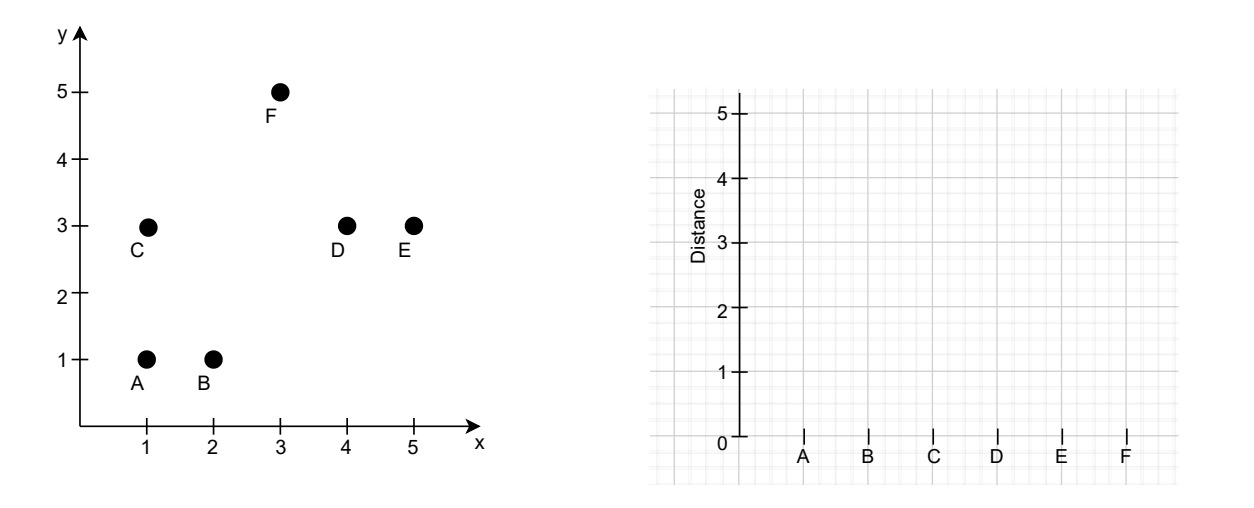

a) You want to cluster the six points seen above. You decide that you want to create a dendrogram using Manhatten distance and average linkage. How does the resulting dendrogram look like? Complete the template given above!

#### Answer

**Manhatten distance**
: a metric used to determine the distance between two points in a grid-like path
- measures the sum of the absolute differences between the coordinates of the points

**Euclidean distance**
- measures the shortest possible line between two points

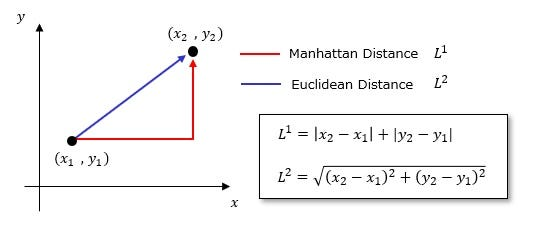

**Average Linkage**
: the distance between two clusters is the average distance between each cluster‚Äôs point to every point in the other cluster
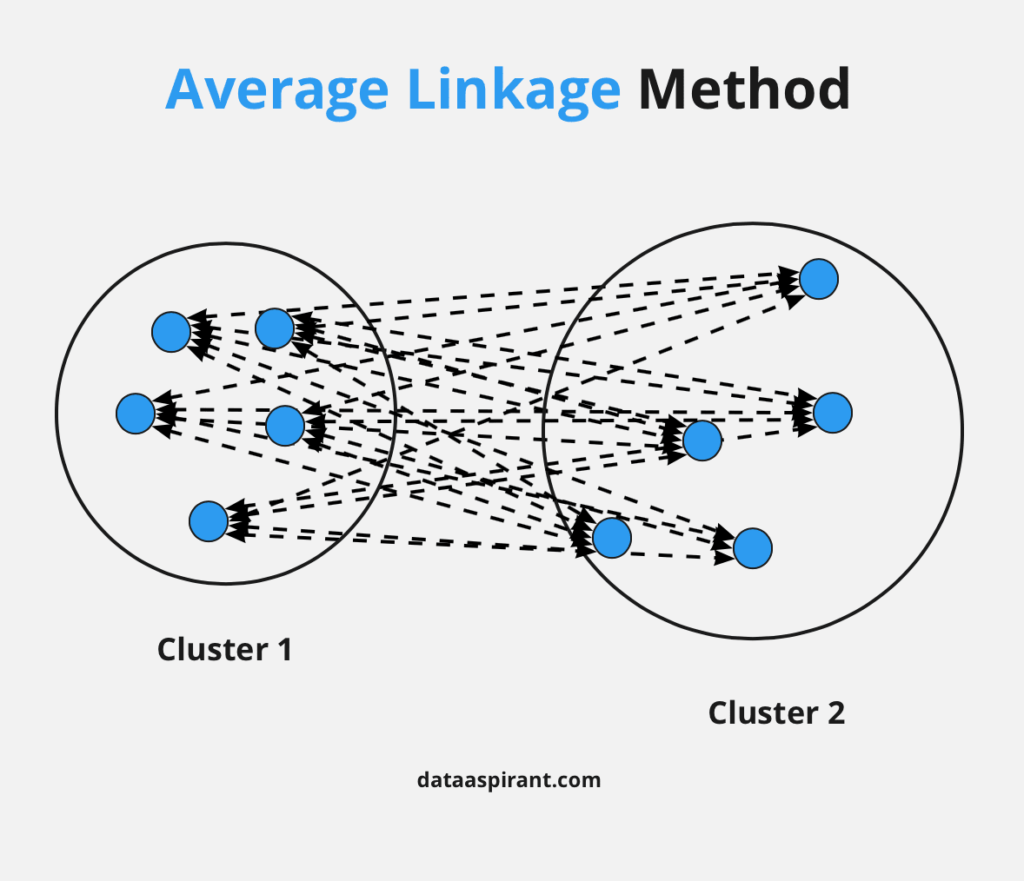

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

In [2]:
dt = [[(1, 1), 'A'], [(2, 1), 'B'], [(1, 3), 'C'], [(4, 3), 'D'], [(5, 3), 'E'], [(3, 5), 'F']]
df = pd.DataFrame(data=dt)
df.columns = ['Coordinates', 'Datapoint']
df

Coordinates Datapoint
0      (1, 1)         A
1      (2, 1)         B
2      (1, 3)         C
3      (4, 3)         D
4      (5, 3)         E
5      (3, 5)         F

In [3]:
# Extract coordinates as NumPy array
coords = np.array(df['Coordinates'].tolist())
coords

array([[1, 1],
       [2, 1],
       [1, 3],
       [4, 3],
       [5, 3],
       [3, 5]])

In [4]:
# Compute Manhattan distances and apply hierarchical clustering
manhattan_dist = pdist(coords, metric='cityblock')
linkage_matrix1 = linkage(manhattan_dist, method='average')

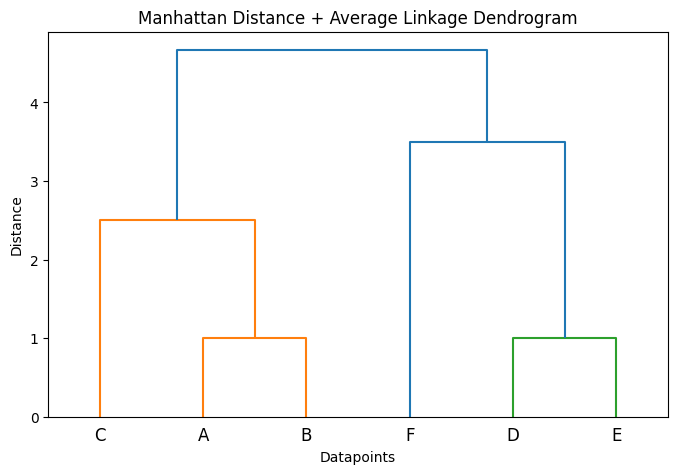

In [5]:
# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix1, labels=df['Datapoint'].values)
plt.title("Manhattan Distance + Average Linkage Dendrogram")
plt.xlabel("Datapoints")
plt.ylabel("Distance")
plt.show()

*Î≥ëÌï©Í≥ºÏ†ï

In [6]:
# Í∞Å Îç∞Ïù¥ÌÑ∞Ìè¨Ïù∏Ìä∏ Ïù¥Î¶Ñ
labels = df['Datapoint'].tolist()
num_points = len(labels)

print("üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ëÌï© ÏàúÏÑú:")

for i, (c1, c2, dist, count) in enumerate(linkage_matrix1):
    # Ïù∏Îç±Ïä§Í∞Ä ÏõêÎûò Îç∞Ïù¥ÌÑ∞ Î≤îÏúÑ ÎÇ¥Ïù¥Î©¥ ÏõêÎûò Ï†ê
    def label(x):
        return labels[int(x)] if x < num_points else f"Cluster_{int(x)}"

    print(f"Step {i+1}: {label(c1)} ÏôÄ {label(c2)} Î•º Í±∞Î¶¨ {dist:.2f}ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_{num_points + i}")

üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ëÌï© ÏàúÏÑú:
Step 1: A ÏôÄ B Î•º Í±∞Î¶¨ 1.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_6
Step 2: D ÏôÄ E Î•º Í±∞Î¶¨ 1.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_7
Step 3: C ÏôÄ Cluster_6 Î•º Í±∞Î¶¨ 2.50ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_8
Step 4: F ÏôÄ Cluster_7 Î•º Í±∞Î¶¨ 3.50ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_9
Step 5: Cluster_8 ÏôÄ Cluster_9 Î•º Í±∞Î¶¨ 4.67ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_10


*Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Ïñ¥Îñ§ Ï†êÏù¥ Îì§Ïñ¥Í∞ÄÎäîÏßÄ?

In [7]:
# Îç¥ÎìúÎ°úÍ∑∏Îû®ÏùÑ 2Í∞úÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú ÏûêÎ•¥Í∏∞
cluster_assignments = fcluster(linkage_matrix1, t=2,
                               criterion='maxclust')

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Ï†ïÎ¶¨
df['Cluster'] = cluster_assignments

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï∂úÎ†•
for cluster_id in sorted(df['Cluster'].unique()):
    members = df[df['Cluster'] == cluster_id]
    print(f"\nüîπ Cluster {cluster_id}:")
    for _, row in members.iterrows():
        print(f" - {row['Datapoint']} at {row['Coordinates']}")


üîπ Cluster 1:
 - A at (1, 1)
 - B at (2, 1)
 - C at (1, 3)

üîπ Cluster 2:
 - D at (4, 3)
 - E at (5, 3)
 - F at (3, 5)


b) You want to cluster the same six points, but using maximum norm and complete linkage. How does the resulting dendrogram look like? Complete the template below!

#### Answer

**Maximum norm(Chebyshev distance)**

$d(p,q) = max(|x_1-x_2|, |y_1, y_2|)$

: x, y Ï§ë Îçî ÌÅ∞ Ï∂ïÏùò Ï∞®Ïù¥Îßå Î∞òÏòÅÌïòÎäî Í±∞Î¶¨

**Complete Linkage**
: Îëê ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏïàÏùò Í∞ÄÏû• Î®º Ï†êÎì§ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
- Í∞ÄÏû• Í∞ÄÍπåÏö¥ Îëê Ï†ê/Í∏∞Ï°¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ÏôÄ Ï†ê ÏÇ¨Ïù¥ Í±∞Î¶¨ ÎπÑÍµê ÌõÑ Î≥ëÌï©
- Î™®Îì† Ï†êÏù¥ ÌïòÎÇòÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Îê† ÎïåÍπåÏßÄ Î∞òÎ≥µ

In [8]:
# Chebyshev Í±∞Î¶¨ Í≥ÑÏÇ∞ + complete linkage Ï†ÅÏö©
chebyshev_dist = pdist(coords, metric='chebyshev')
linkage_matrix2 = linkage(chebyshev_dist, method='complete')

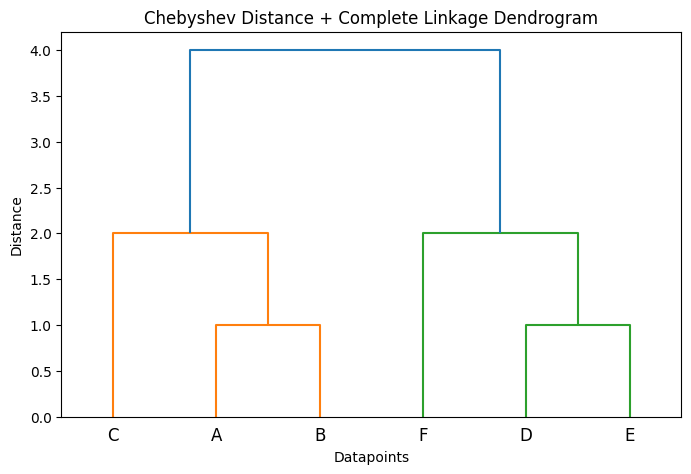

In [9]:
# Îç¥ÎìúÎ°úÍ∑∏Îû® ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
dendrogram(linkage_matrix2, labels=df['Datapoint'].values)
plt.title("Chebyshev Distance + Complete Linkage Dendrogram")
plt.xlabel("Datapoints")
plt.ylabel("Distance")
plt.show()

*Î≥ëÌï© Í≥ºÏ†ï

In [10]:
# Í∞Å Îç∞Ïù¥ÌÑ∞Ìè¨Ïù∏Ìä∏ Ïù¥Î¶Ñ
labels = df['Datapoint'].tolist()
num_points = len(labels)

print("üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ëÌï© ÏàúÏÑú:")

for i, (c1, c2, dist, count) in enumerate(linkage_matrix2):
    # Ïù∏Îç±Ïä§Í∞Ä ÏõêÎûò Îç∞Ïù¥ÌÑ∞ Î≤îÏúÑ ÎÇ¥Ïù¥Î©¥ ÏõêÎûò Ï†ê
    def label(x):
        return labels[int(x)] if x < num_points else f"Cluster_{int(x)}"

    print(f"Step {i+1}: {label(c1)} ÏôÄ {label(c2)} Î•º Í±∞Î¶¨ {dist:.2f}ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_{num_points + i}")

üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ëÌï© ÏàúÏÑú:
Step 1: A ÏôÄ B Î•º Í±∞Î¶¨ 1.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_6
Step 2: D ÏôÄ E Î•º Í±∞Î¶¨ 1.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_7
Step 3: C ÏôÄ Cluster_6 Î•º Í±∞Î¶¨ 2.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_8
Step 4: F ÏôÄ Cluster_7 Î•º Í±∞Î¶¨ 2.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_9
Step 5: Cluster_8 ÏôÄ Cluster_9 Î•º Í±∞Î¶¨ 4.00ÏóêÏÑú Î≥ëÌï© ‚Üí ÏÉà ÌÅ¥Îü¨Ïä§ÌÑ∞: Cluster_10


*Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Ïñ¥Îñ§ Ï†êÏù¥ Îì§Ïñ¥Í∞ÄÎäîÏßÄ?

In [11]:
# Îç¥ÎìúÎ°úÍ∑∏Îû®ÏùÑ 2Í∞úÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú ÏûêÎ•¥Í∏∞
cluster_assignments = fcluster(linkage_matrix2, t=2,
                               criterion='maxclust')

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Ï†ïÎ¶¨
df['Cluster'] = cluster_assignments

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï∂úÎ†•
for cluster_id in sorted(df['Cluster'].unique()):
    members = df[df['Cluster'] == cluster_id]
    print(f"\nüîπ Cluster {cluster_id}:")
    for _, row in members.iterrows():
        print(f" - {row['Datapoint']} at {row['Coordinates']}")


üîπ Cluster 1:
 - A at (1, 1)
 - B at (2, 1)
 - C at (1, 3)

üîπ Cluster 2:
 - D at (4, 3)
 - E at (5, 3)
 - F at (3, 5)


c) You want two clusters to be formed with maximum norm and complete linkage. What distance do you have to choose? What points are in the clusters?

#### Answer

- Distance Choice
    - When we use maximum norm, we have to choose **Chebychev Distance**.
- Datapoints
    - For Cluster #1, there are datapoints **A, B, and C**.
    - For Cluster #2, there are datapoints **D, E, and F**.

## Task #2: Clustering with DBSCAN

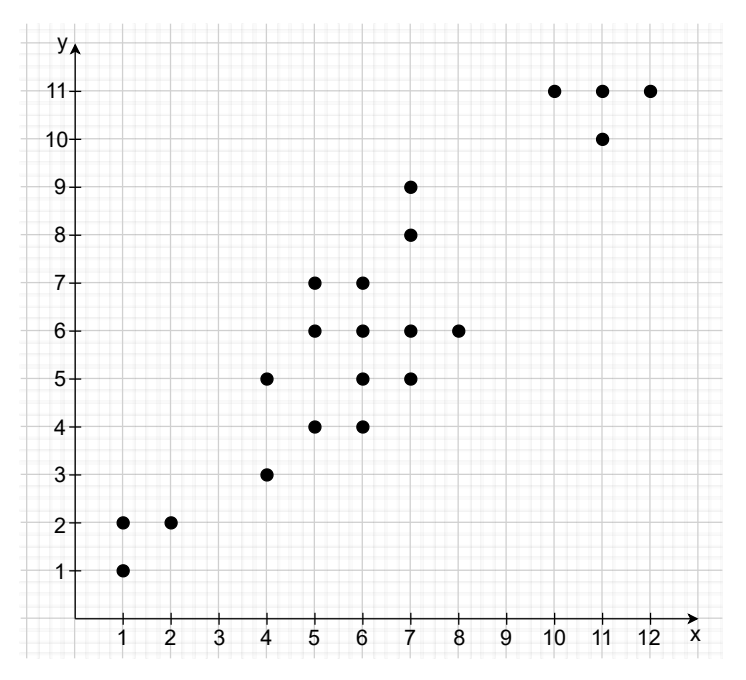

a) You want to cluster the points seen above. You decide that you want to use the density based clustering-algorithm DBSCAN. How would a clustering with $minPts = 4$ and $œµ = 2$ look like? Add the clusters to the Figure above. (Use Euclidean distance.)

- $minPts$: Ìïú Ï†êÏù¥ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ï§ëÏã¨Ïù¥ ÎêòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú **Ïù¥ÏõÉÏùò Ïàò**
- $œµ$: Ïù¥ÏõÉÏù¥ÎùºÍ≥† Í∞ÑÏ£ºÎêòÍ∏∞ ÏúÑÌïú Í∏∞Ï§ÄÏù¥ ÎêòÎäî **Í±∞Î¶¨**

#### DBSCAN
Î∞ÄÎèÑ Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏïåÍ≥†Î¶¨Ï¶ò.

Ï°∞Î∞ÄÌïòÍ≤å *Î™®Ïó¨ÏûàÎäî* Ï†êÎì§ÏùÄ Í∞ôÏùÄ clusterÎ°ú,
*Ï£ºÎ≥ÄÏóê Ïù¥ÏõÉÏù¥ ÏóÜÎäî* Ï†êÎì§ÏùÄ noiseÎ°ú Í∞ÑÏ£º

- ÏûëÎèô Î∞©Ïãù
    - **core point**: Ï£ºÎ≥Ä epsilon Í±∞Î¶¨ ÏïàÏóê minPts Ïù¥ÏÉÅÏùò Ï†êÏù¥ ÏûàÏúºÎ©¥ core pointÎ°ú Í∞ÑÏ£ºÎê®.
    - **border point**: ÏûêÍ∏∞ ÏûêÏã†Ïù¥ core pointÎäî ÏïÑÎãàÏßÄÎßå, core point Í∑ºÏ≤òÏóê ÏûàÏúºÎ©¥ border point
    - **noise**: core pointÎèÑ, border pointÎèÑ ÏïÑÎãå Ï†ê

#### Euclidean distance
$d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

In [12]:
from sklearn.cluster import DBSCAN

In [19]:
points = {
    'A': (1, 1), 'B': (1, 2), 'C': (2, 2), 'D': (4, 3), 'E': (4, 5), 'F': (5, 4),
    'G': (5, 6), 'H': (5, 7), 'I': (6, 4), 'J': (6, 5), 'K': (6, 6), 'L': (6, 7),
    'M': (7, 5), 'N': (7, 6), 'O': (7, 8), 'P': (7, 9), 'Q': (8, 6),
    'R': (10, 11), 'S': (11, 10), 'T': (11, 11), 'U': (12, 11)
}

data2 = [[name, coord] for name, coord in points.items()]
col_name = ['Datapoint', 'Coordinates']

# DataFrame ÏÉùÏÑ±
df2 = pd.DataFrame(data=data2, columns=col_name)
df2.head()

Datapoint Coordinates
0         A      (1, 1)
1         B      (1, 2)
2         C      (2, 2)
3         D      (4, 3)
4         E      (4, 5)

In [25]:
# DBSCANÏùÄ Ïà´ÏûêÎ°ú Îêú Î∞∞Ïó¥Ïù¥ ÌïÑÏöî. Îî∞ÎùºÏÑú ÌäúÌîå->Ïà´Ïûê Î∞∞Ïó¥Î°ú Î≥ÄÌôò
coords = np.array(df2['Coordinates'].tolist())

In [43]:
# epsilon Í∞í = eps, minPts Í∞í = min_samples
# Euclidean distance = metric ÏòµÏÖò Îí§Ïóê ÎÑ£Í∏∞
db = DBSCAN(eps=2, min_samples=4, metric='euclidean')
cluster_labels = db.fit_predict(coords)

In [44]:
df2['Cluster'] = cluster_labels

Ïù¥Îïå, -1ÏùÄ noiseÍ∞í. Cluster numberÎäî 0Î∂ÄÌÑ∞ ÏãúÏûë

<ipython-input-45-1da8cc0a9e50>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


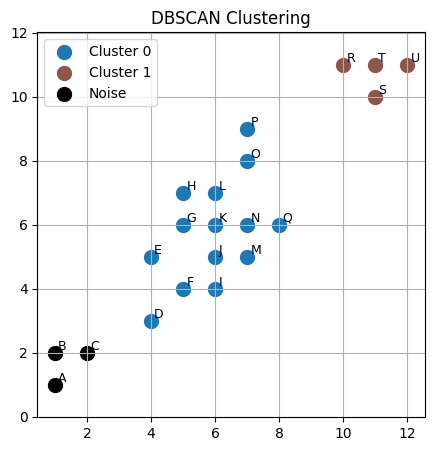

In [45]:
# ÏãúÍ∞ÅÌôî
x = coords[:, 0]
y = coords[:, 1]

plt.figure(figsize=(5, 5))
unique_labels = set(cluster_labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    color = 'k' if label == -1 else colors(label)
    mask = (cluster_labels == label)
    plt.scatter(x[mask], y[mask], c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=100)

# Í∞Å Ï†ê Ïù¥Î¶Ñ ÌëúÏãú
for i in range(len(df2)):
    name = df2.loc[i, 'Datapoint']
    x_pos, y_pos = df2.loc[i, 'Coordinates']
    plt.text(x_pos + 0.1, y_pos + 0.1, name, fontsize=9)

plt.title('DBSCAN Clustering')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [46]:
# minPtsÍ∞íÍ≥º epsilonÍ∞íÏùÑ ÎÑ£ÏóàÏùÑ Îïå, ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏàòÌñâÌïòÍ≥† ÏãúÍ∞ÅÌôîÍπåÏßÄ ÌïòÎäî Ìï®Ïàò ÏÉùÏÑ±
def generatePlot(df, epsilon, minPts):
    coords = np.array(df['Coordinates'].tolist())

    db = DBSCAN(eps=epsilon, min_samples=minPts, metric='euclidean')
    cluster_labels = db.fit_predict(coords)

    df['Cluster'] = cluster_labels

    x = coords[:, 0]
    y = coords[:, 1]

    plt.figure(figsize=(5, 5))
    unique_labels = set(cluster_labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for label in unique_labels:
        color = 'k' if label == -1 else colors(label)
        mask = (cluster_labels == label)
        plt.scatter(x[mask], y[mask], c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', s=100)

    # Í∞Å Ï†ê Ïù¥Î¶Ñ ÌëúÏãú
    for i in range(len(df)):
        name = df.loc[i, 'Datapoint']
        x_pos, y_pos = df.loc[i, 'Coordinates']
        plt.text(x_pos + 0.1, y_pos + 0.1, name, fontsize=9)

    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

<ipython-input-46-794a4135c774>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


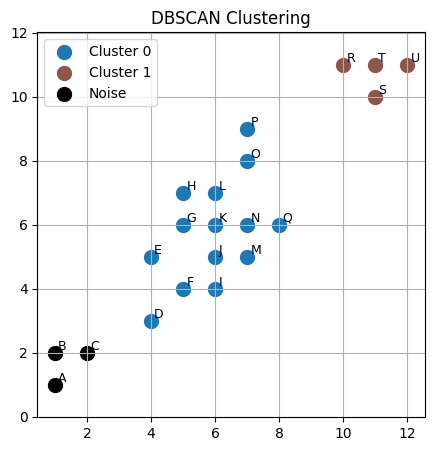

In [47]:
generatePlot(df2, 2, 4)

b) You are not yet happy with the clustering result. So you can try again with minPts=3 and eps=1. How does the result look like? Add the clusters to the picture below.

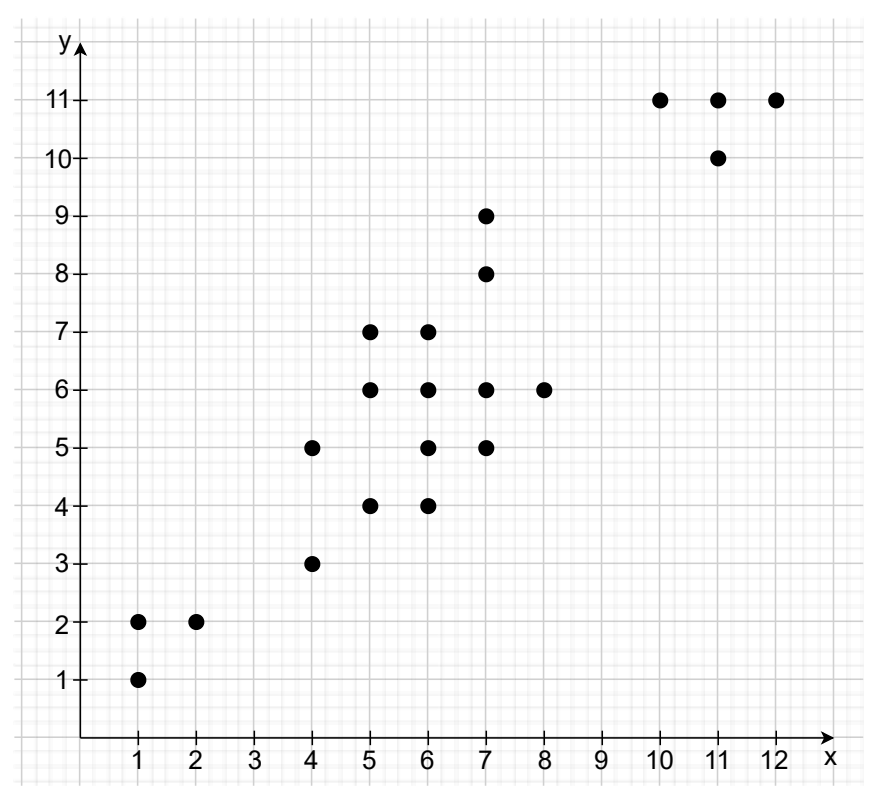

<ipython-input-46-794a4135c774>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


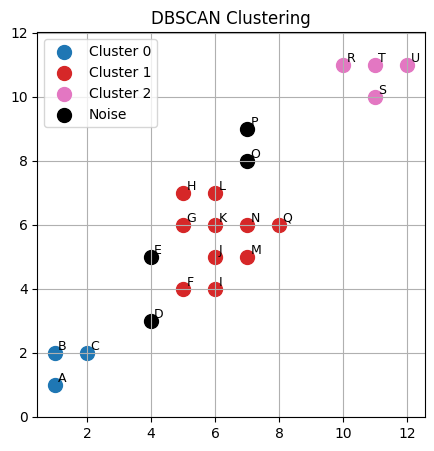

In [48]:
generatePlot(df2, 1, 3)

c) How do you have to choose minPts and epsilon so that three clusters are formed and not a single point is classified as noise?

<ipython-input-46-794a4135c774>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


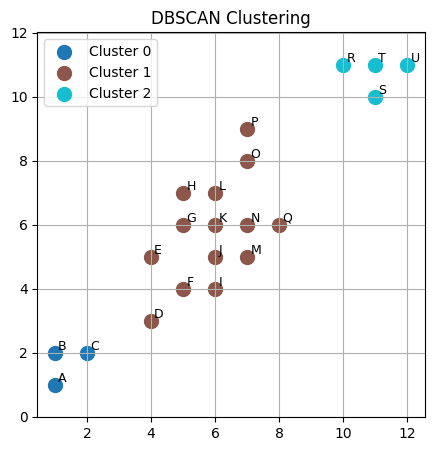

In [49]:
generatePlot(df2, 2, 3)

ÏûëÏùÄ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ÎèÑ core/border pointÎ°ú Ïù∏Ï†ïÎêòÎèÑÎ°ù ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú, Ïù¥ÏõÉÏùò Ïàò(minPts)Î•º 3 Ï†ïÎèÑÎ°ú Ï°∞Ï†ïÌïúÎã§. ÎòêÌïú, Í±∞Î¶¨(epsilon)Ïùò Í≤ΩÏö∞ 2 Ï†ïÎèÑÎ°ú Ï°∞Ï†ïÌïòÏó¨ ÏµúÎåÄÌïú ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§Ïù¥ Ìè¨Ìï®Îê† Ïàò ÏûàÎèÑÎ°ù ÌïúÎã§.